
### How to Handle Categorial Missing Values

**1. Replace with Most Frequent values - Mode**


**2. Replace values with Missing keyword.**


###  1.    Assumptions to use Mode

- If Data is MCAR
- Missing values is less than 5%.
- Any one category should dominate another category.


### Advantages

- Simple to implement

### Disadvantages

- Distribution gets changed.


###  2.    Assumptions to use Missing Keyword

- Suppose there is category in which 3 values are available.
- If data is not missing completely at random and missing values is greater than 10% 
- Then we have to Add one category for missing values and replace that with missing keyword.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day37-handling-missing-categorical-data\\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df = df[['FireplaceQu','GarageQual','SalePrice']]
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [5]:
df.shape

(1460, 3)

<AxesSubplot:>

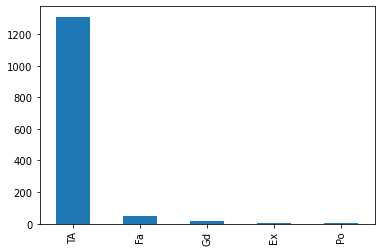

In [6]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

### For Both the category we will replace with Mode values and check the distribution that whether after replacing with Mode values , distribution getting changed or not .

In [7]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [8]:
df['GarageQual'].isnull().sum()

81

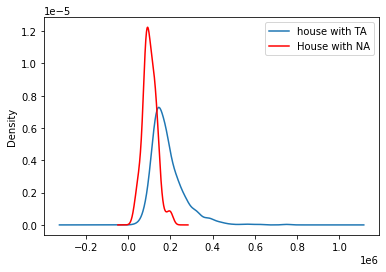

In [9]:

# check distribution with missing values and highest mode values 

fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,label=ax.get_legend_handles_labels()
labels=['house with TA', 'House with NA']
ax.legend(lines,labels,loc='best')
plt.show()


In [10]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [11]:

# Replace the missing values with TA which was highest in that category 

df['GarageQual'].fillna('TA',inplace=True)

### we are getting same distribution , so this will work.

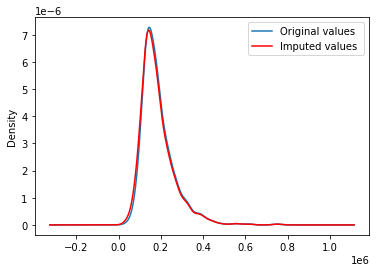

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,label=ax.get_legend_handles_labels()
labels=['Original values', 'Imputed values ']
ax.legend(lines,labels,loc='best')
plt.show()

### Now Replace for FireplaceQu Feature

<AxesSubplot:>

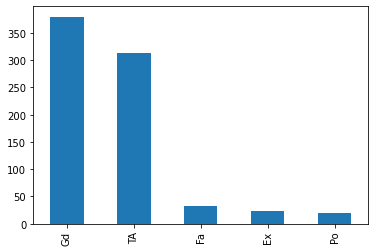

In [13]:
df['FireplaceQu'].value_counts().plot(kind='bar')

# Here the distribution is evenly separated 
# It is not dominate the other values , so here replace missing with mode will 
# not work .


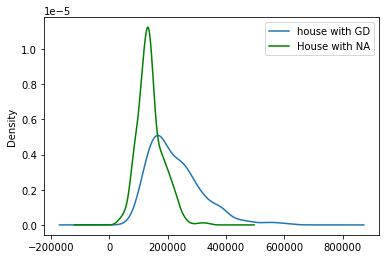

In [14]:
# check distribution with missing values and highest mode values 

fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='green')

lines,label=ax.get_legend_handles_labels()
labels=['house with GD', 'House with NA']
ax.legend(lines,labels,loc='best')
plt.show()

<AxesSubplot:>

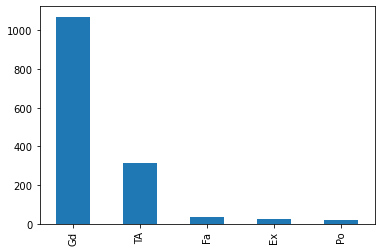

In [15]:
temp_fire = df[df['FireplaceQu']=='Gd']['SalePrice']

df['FireplaceQu'].fillna('Gd',inplace=True)

df['FireplaceQu'].value_counts().plot(kind='bar')


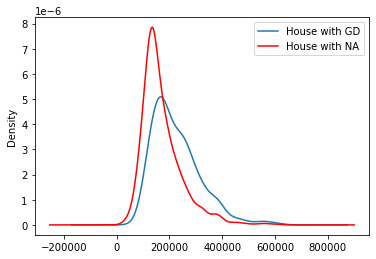

In [16]:

fig=plt.figure()
ax=fig.add_subplot(111)

temp_fire.plot(kind='kde',ax=ax)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,label=ax.get_legend_handles_labels()
labels=['House with GD', 'House with NA']
ax.legend(lines,labels,loc='best')
plt.show()

# the distribution for fireplace after replacing with mode is not Good.
# As there was no single category which was dominating the entire category.
# So we cannot replace with mode for FireplaceQu feature.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X=df.drop(columns=['SalePrice'],axis=1)
y=df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [18]:
imputer=SimpleImputer(strategy='most_frequent')

X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [19]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### THE END